In [1]:
from globalbonds.dataio.data_lib import DataLib
from globalbonds.indicators.signal import Signal
from globalbonds.indicators.indicator import Indicator

from plotnine import *

DATA_LIB = DataLib('../SignalData')

DATA_LIB.list()

['GDP-Real',
 'EquityPrices',
 'LongRates',
 'CurrAcctNom-inUSD',
 'CoreCPI-SA',
 'fxTrdWts-Real',
 'M3-inUSD',
 'CurrAcctPctGDP',
 'fxTrdWts-Nominal',
 'BondRetIdx-LocalFX',
 'fxVsUSD',
 'M2-inUSD',
 'M1-inUSD',
 'ShortRates',
 'GDP-Nominal']

/home/dcdanko/Dev/Internship2020/globalbonds/globalbonds/indicators/normalization.py:12: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  lambda x: x[:window - gap].mean()
/home/dcdanko/Dev/Internship2020/globalbonds/globalbonds/indicators/normalization.py:29: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  lambda x: x[:window - gap].mean()
/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 10 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)
/home/dcdanko

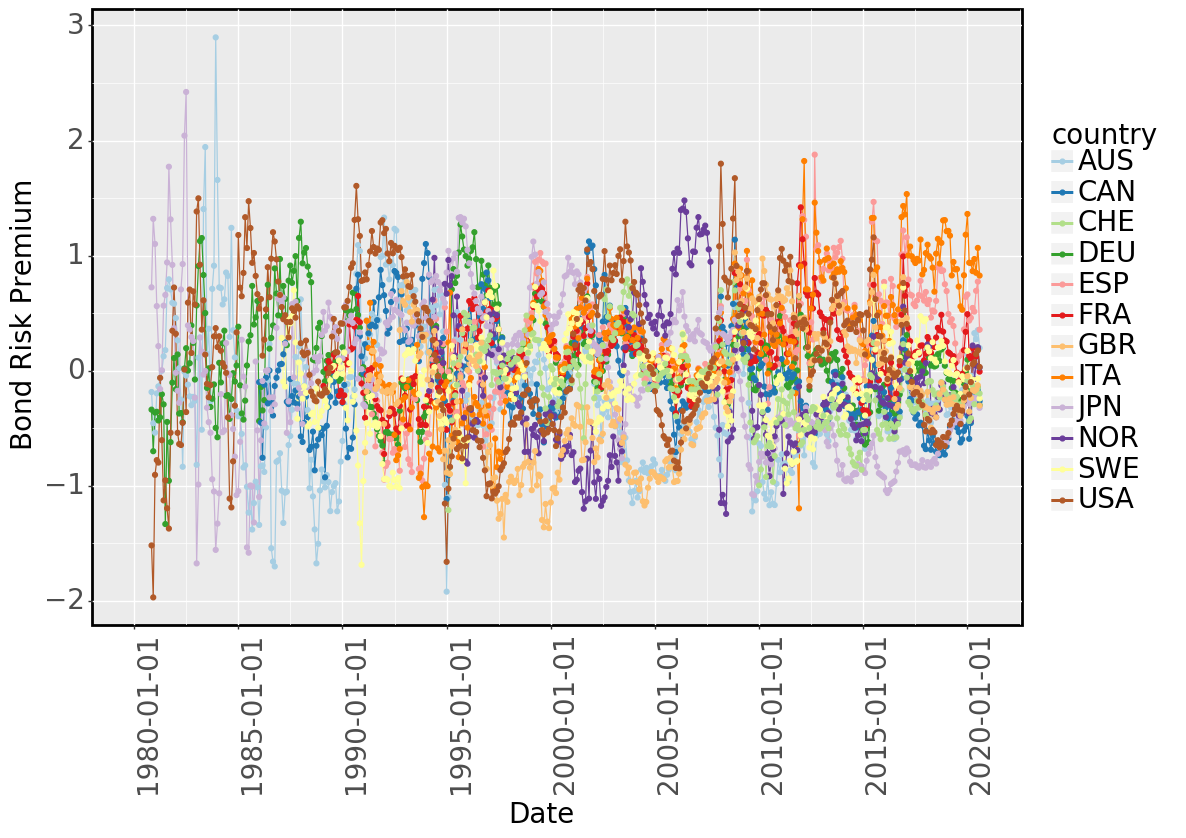

/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 10 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)
/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 1061 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


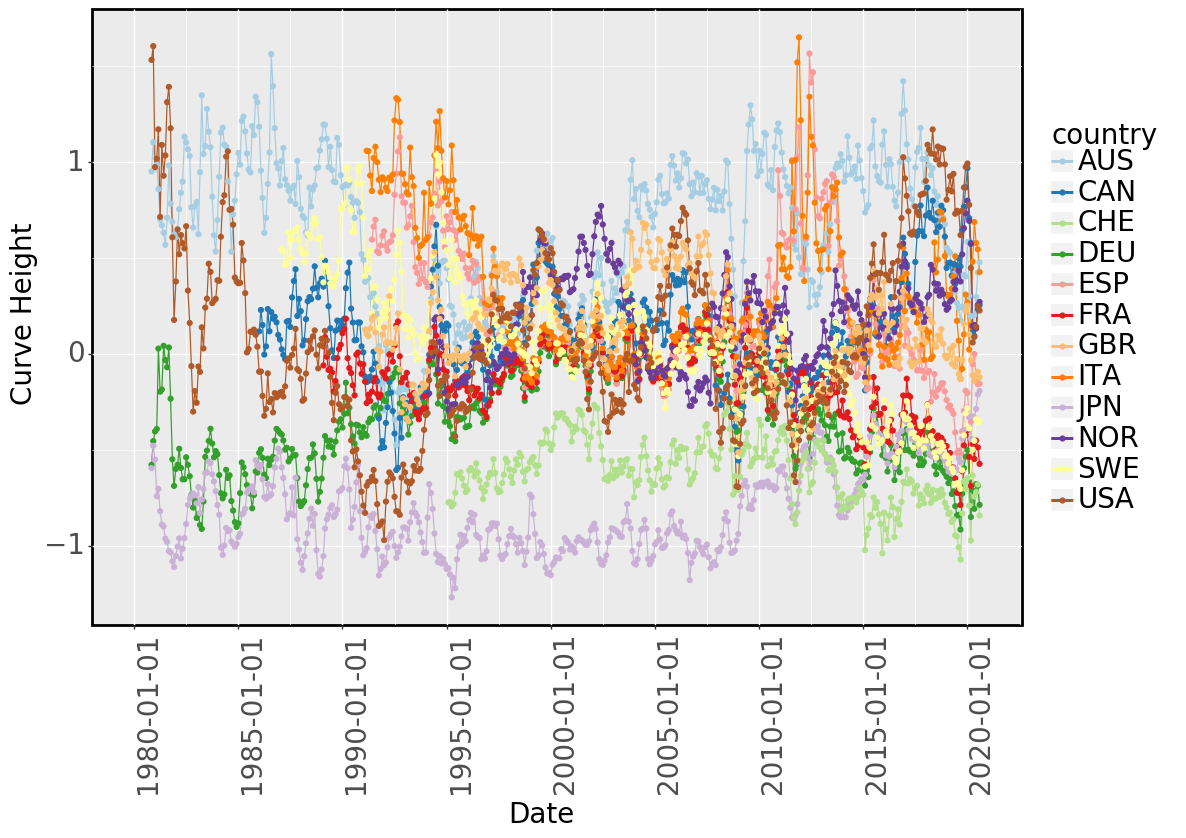

[<ggplot: (8732369555313)>, <ggplot: (8732369515142)>]

In [2]:
rate_2yr, rate_10yr = DATA_LIB.pull('ShortRates'), DATA_LIB.pull('LongRates')
risk_premium = Signal('bond_risk_premium', rate_10yr - rate_2yr)
curve_height = Signal('yield_curve_height', (rate_10yr + rate_2yr) / 2)

[risk_premium.plot(ylabel='Bond Risk Premium'), curve_height.plot(ylabel='Curve Height')]


In [10]:
yield_curve = Indicator('yield_curve', risk_premium, curve_height)
vals = yield_curve.get_values_at_all_times(subsample=1)

vals

/home/dcdanko/miniconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/dcdanko/miniconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


,metric,variable,value,date
0,mean,USA,NaN,1980-01-01
1,median,USA,NaN,1980-01-01
2,mean_first_deriv,USA,NaN,1980-01-01
3,median_first_deriv,USA,NaN,1980-01-01
4,mean,SWE,NaN,1980-01-01
...,...,...,...,...
43,median_first_deriv,AUS,1.010300,2020-08-01
44,mean,ITA,0.625899,2020-08-01
45,median,ITA,0.625899,2020-08-01
46,mean_first_deriv,ITA,0.051596,2020-08-01


In [11]:
def plot_metric(tbl, metric):
    tbl = tbl.query('metric == @metric')
    return (
        ggplot(tbl, aes(x='date', y='value', color='variable')) +
            geom_line() +
            geom_point() +
            scale_color_brewer(type='qualitative', palette=3) +
            ylab(metric) +
            xlab('Date') +
            scale_x_date() +
            theme(
                text=element_text(size=20),
                figure_size=(12, 8),
                legend_position='right',
                axis_text_x=element_text(size=20, angle=90, hjust=0),
                panel_border=element_rect(colour="black", size=2),
            )
    )


/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 10 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)
/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 1061 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


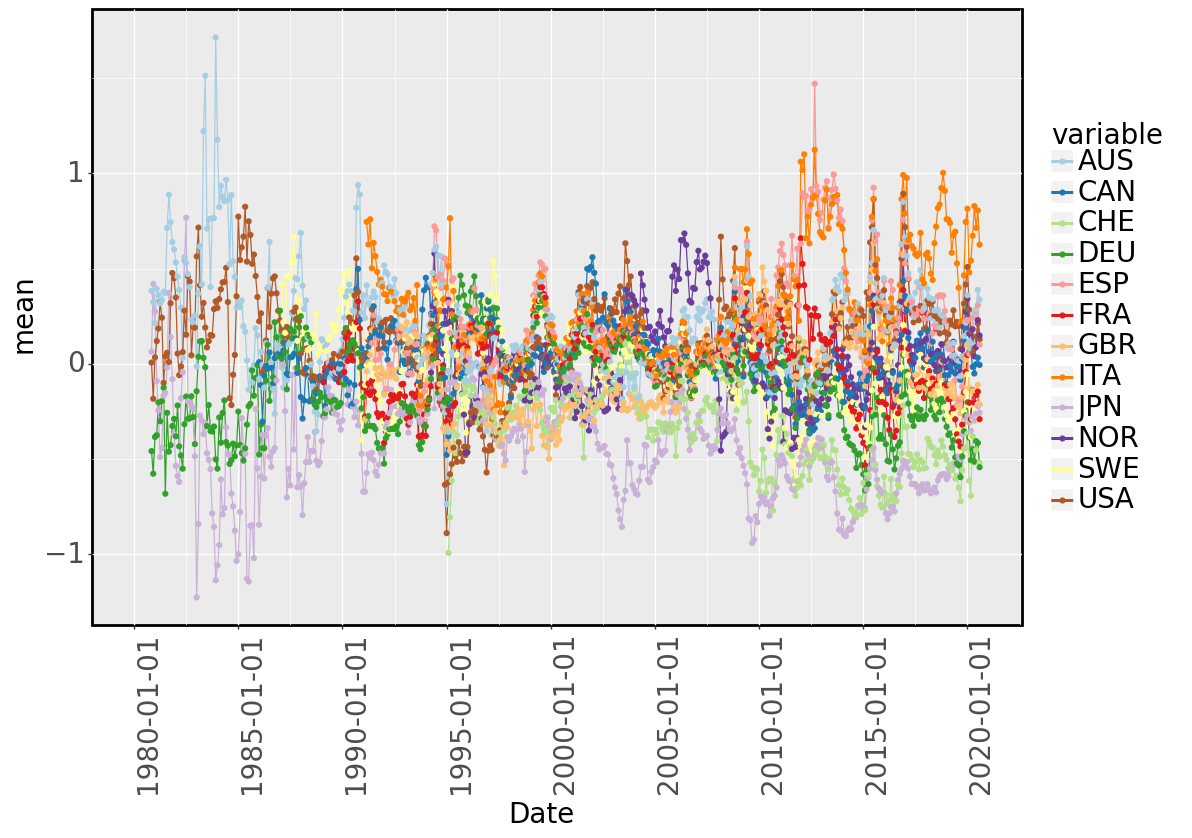

/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 10 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)
/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 1061 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


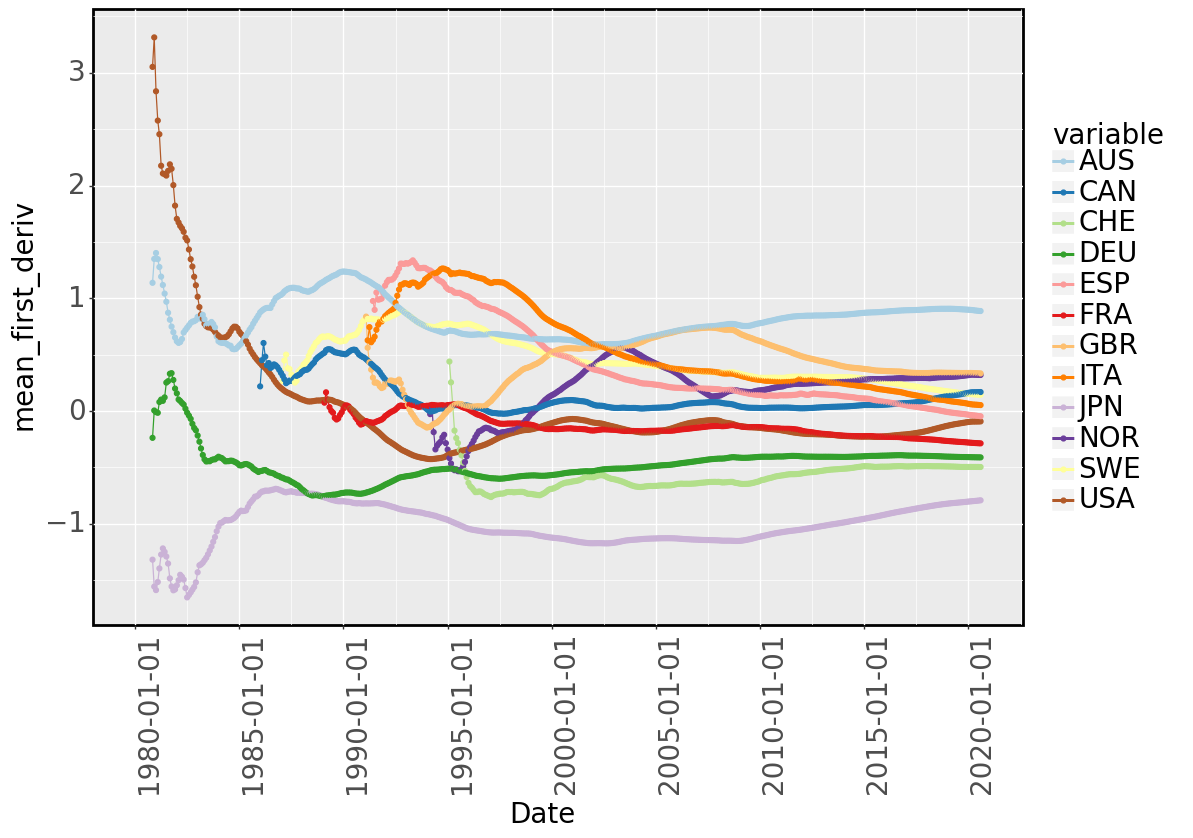

[<ggplot: (8732332838313)>, <ggplot: (-9223363304521962159)>]

In [12]:
[plot_metric(vals, 'mean'), plot_metric(vals, 'mean_first_deriv')]